# A brief guide to the python visualizatiion landscape 
### Mike Schaid PhD

the purpose of this post is not a tutorial, although good practice is to review the code used. The purpose is to provide a "roadmap" of sorts to visualization packages and provide new python users a tool kit for easy decion making when it comes to visualizing data. We'll use an already cleaned dataset from Kaggle. We'll save the traditional datascience workflow for another post, and get right into visualization. 

* background on MPL
* the fundmental plotting package
* all static packages are just wrappers for matplotlib
* despite its complexity, it is worth getting a basic understanding


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import plotly.express as px


%matplotlib inline 
plt.rcParams['figure.dpi'] = 400
sns.set(rc = {'figure.figsize':(2,2)})
plt.style.use('default')

Diabetes dataset available here
https://www.kaggle.com/datasets/mathchi/diabetes-data-set

or on my github 
https://github.com/Mschaid/Blog/tree/main/dataviz


In [3]:
data = pd. read_csv('/Users/michaelschaid/GitHub/Blog/dataviz/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:

diab =(
    data.mask(data==0).fillna(data.mean())
    .assign(weight_category = pd.cut(data.BMI,bins=[0,18.5,25,30,35,40,100],
                                            labels=['Underweight','Normal','Overweight','Obesity Class I',
                                            'Obesity Class II','Obesity Class III'], ordered=True),
            age_category = pd.cut(data.Age,bins=[18,25,65,100],
                                            labels=['Young Adult','Adult','Senior'], ordered=True),
            bp_category= pd.cut(data.BloodPressure, bins=[20.0,80.0,90.0,200.0],
                                            labels=['Normal','Eleveated','Hypertension'], ordered=True),
            disease_category=pd.cut(data.Outcome, bins=[-0.1,0.9,1.1], labels=['Healthy','Diabetic'], ordered=True)
                                            )
            
)
diab=diab.dropna()
diab

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,weight_category,age_category,bp_category,disease_category
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1.000000,Obesity Class I,Adult,Normal,Diabetic
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0.348958,Overweight,Adult,Normal,Healthy
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1.000000,Normal,Adult,Normal,Diabetic
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0.348958,Overweight,Young Adult,Normal,Healthy
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1.000000,Obesity Class III,Adult,Normal,Diabetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0.348958,Obesity Class I,Adult,Normal,Healthy
764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0.348958,Obesity Class II,Adult,Normal,Healthy
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0.348958,Overweight,Adult,Normal,Healthy
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1.000000,Obesity Class I,Adult,Normal,Diabetic


Matplot lib allows for quick, but realtively unattractive plots. They arent hiddeous, but they are stock. Thats intentional, and the power truly lies in the ability to control every feature of the plot. We can go from this:


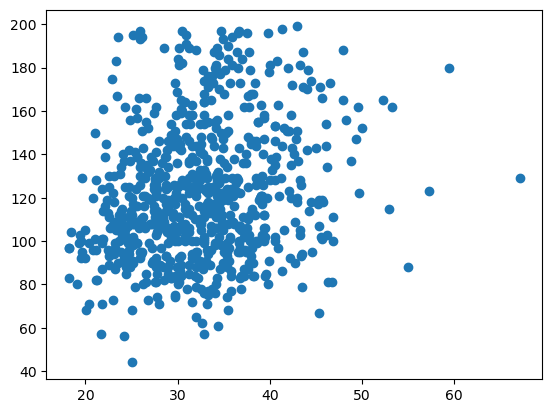

In [5]:
plt.scatter(x=diab['BMI'], y=diab['Glucose'])
plt.show()

to this:
> highlight that some of code is unitentially repetitive so you can get an idea for whats going on. We will cover effiecnt matplot lib plotting in another post

>  spolier alert, you can use write custom functions for clean code, from a programming perspective this is the correct way to do 

Text(0, 0.5, 'Blood glucose (ng/dL)')

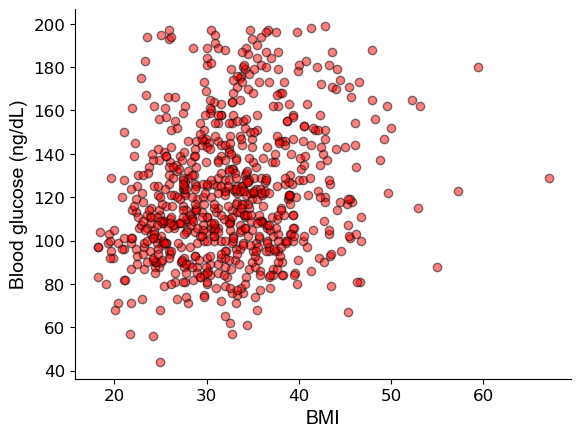

In [6]:
#initialize a figure
fig, ax = plt.subplots()

#plot the data
plt.scatter(x=diab['BMI'],
            y=diab['Glucose'],
            color='red',  
            edgecolor='black', 
            alpha=0.5)

#remove unwated top and right spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

# increase font size of tick labels
ax.tick_params(axis='both', labelsize=12)

# set x and y labels
ax.set_xlabel('BMI',font = "Arial", fontsize=14)
ax.set_ylabel('Blood glucose (ng/dL)', font = "Arial", fontsize=14)


great. This looks like something we might see in a paper, or at least is attractive enough we would be ok showing our collegues, but this is one plot. This isnt exactly proficient for visualizing our data quickly, and in way that we are comfortable sharing. Personally, I reserve matplot lib for making figures for maniscripts and journal articles. What about large datasets, with a lot of features that we want to see quickly, or basic statisical plots? This is exactly what seaborn was developed for. Lets make the same scatter plot and expand on it with seaborn. 

<AxesSubplot:xlabel='BMI', ylabel='Glucose'>

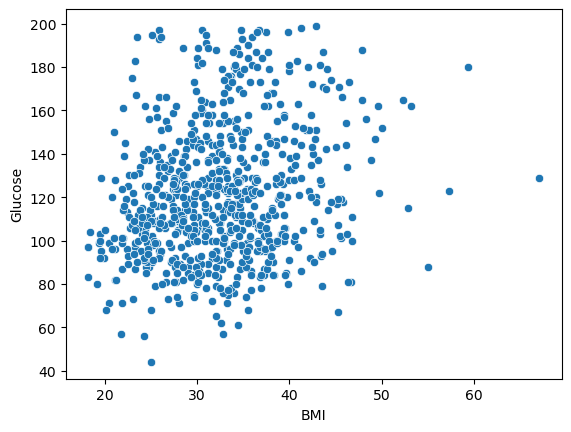

In [7]:
sns.scatterplot(x='BMI', y='Glucose', data=diab)

you can see at baseline its kind of 'good enough', if we just wanted to show our collegues and move on. but there are some really powerful methods we can use to visualize our data quckly. With seaborn, we get abbreviatged syntax, easy group segregation with the 'Hue' feature (for group color)and quick plots that look good. 

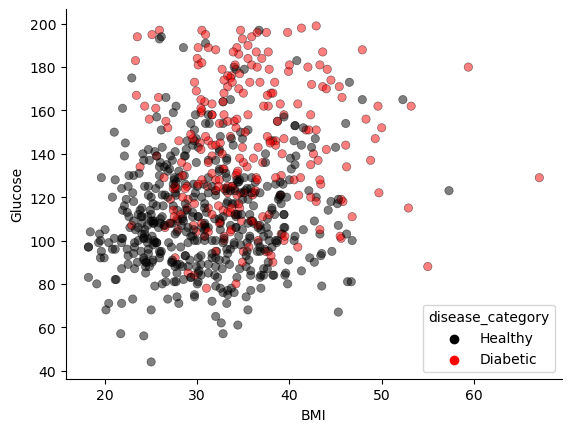

In [8]:
sns.scatterplot(data=diab, x='BMI', y='Glucose', hue='disease_category', 
                palette=['black', 'red'], edgecolor='black', alpha=0.5)
sns.despine()

The thing is, as mentioned, seaborn is running matplot lib in the background so we still have full control with matplotlib attributes. Using the exact same syntax we used for custimzations in the matplotlib scatter plot we made earlier:

Text(0, 0.5, 'Blood glucose (ng/dL)')

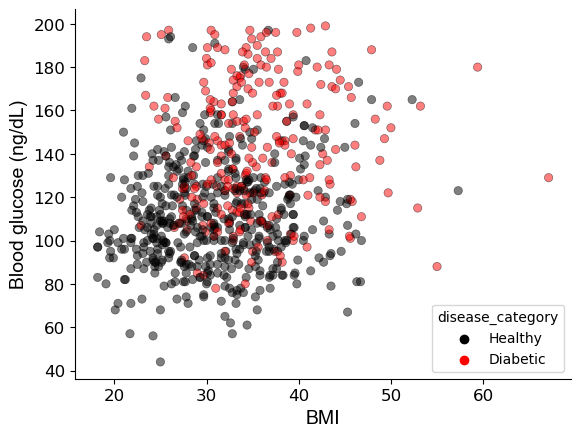

In [9]:
fig, ax = plt.subplots()

sns.scatterplot(data=diab, x='BMI', y='Glucose', hue='disease_category', 
                palette=['black', 'red'], edgecolor='black', alpha=0.5)
#remove unwated top and right spines
sns.despine()

# increase font size of tick labels
ax.tick_params(axis='both', labelsize=12)

# set x and y labels
ax.set_xlabel('BMI',font = "Arial", fontsize=14)
ax.set_ylabel('Blood glucose (ng/dL)', font = "Arial", fontsize=14)

A couple more features of seaborn worth mentioning are the ease of plotting categorical relationships such as in a relplot
we could do this in matplotlib but, would it would take us substantially more effor and syntax

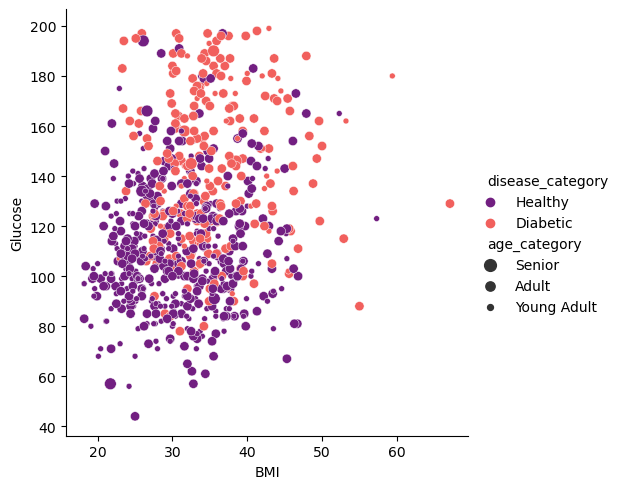

In [10]:

sns.relplot(x='BMI', y='Glucose', data=diab, size='age_category', size_order=['Senior', 'Adult', 'Young Adult'], hue='disease_category', palette="magma")

one other highlight is that eventhough seaborn is a MPL wrapper, it does have a lot of flexibility and power. Even with a few short lines of code we can facet data easily

/Users/michaelschaid/opt/anaconda3/envs/blog/lib/python3.10/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.


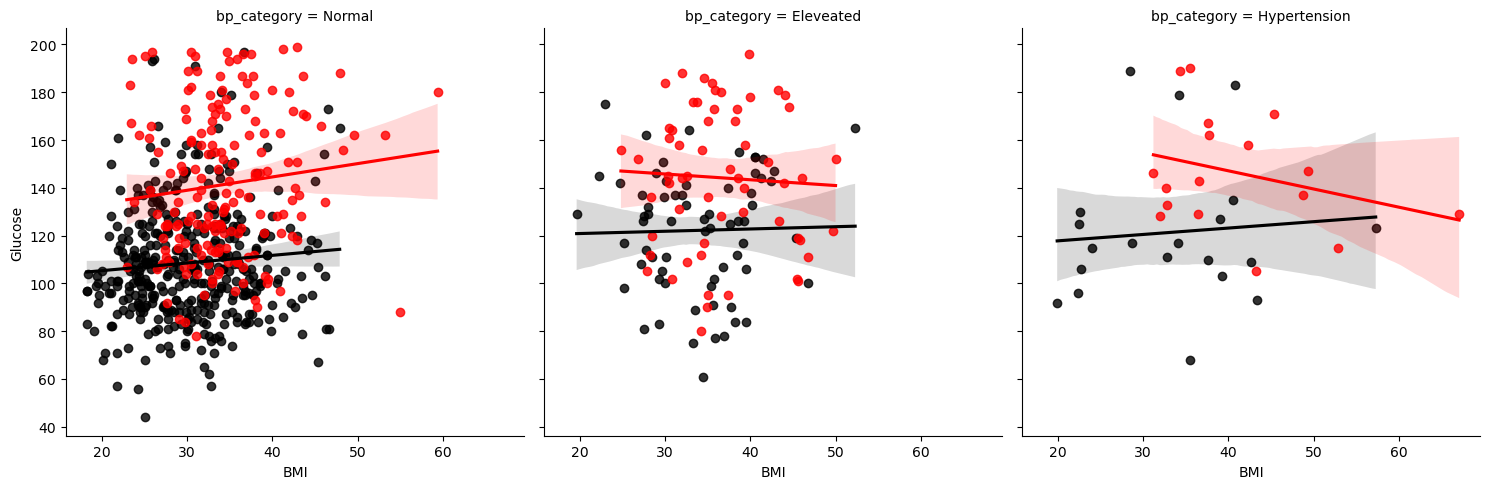

In [11]:
grid = sns.FacetGrid(diab, col='bp_category', hue='disease_category', 
                     palette=['black', 'red'], size=5)
grid.map(sns.regplot, 'BMI', 'Glucose')

we can see that seaborn has a lot of power for data visualiztion, but it cant be overstarted, that all of these plots are indeed acheivable in matplotlib becuase they ARE matplotlib, seaborn is just a tool to write shorter syntax and save you time. There are many other powerful plots worth exploring in the documentation. 

But wait, there are more packages enter plotnine. Plotnine is an interesting package. Just like seaborn, plotnine is a matplotlib wrapper, but with a twist. Plotnine is part of a greater ecosystem, that aims to ease the mimic the R tidyverse in python. The idea is that it uses the same style of syntax as the popular R packlage, ggplot and ggplot2, which utilizes the "grammer of graphics" logic popularized by Leland Wilkinson and implemented by Hadley Wickham. We'll recreate the facetgrid we just made with

/Users/michaelschaid/opt/anaconda3/envs/blog/lib/python3.10/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/michaelschaid/opt/anaconda3/envs/blog/lib/python3.10/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


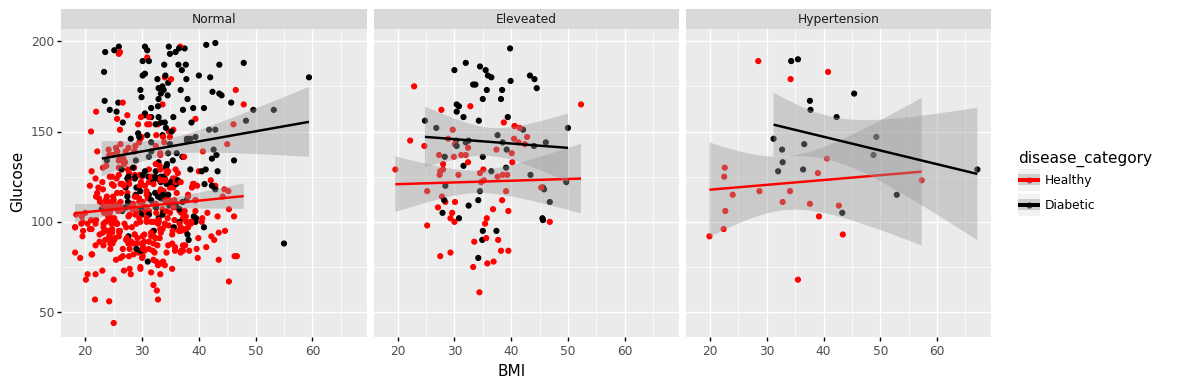

<ggplot: (8776528568912)>

In [13]:
p= (ggplot(diab, aes('BMI', 'Glucose', color='disease_category'))
+ geom_point()
+ scale_color_manual(['red', 'black'])
+ stat_smooth(method='lm')
+ facet_wrap('~bp_category')
+ theme(figure_size=(12, 4))
 )
p


We can see plotnine certainly has its advatages, and a firm grasp of the grammar of graphics is required. I left it with the standard ggplot2 theme so any R users can see that it really does a great job at replicating ggplot, but we can customize to aesthetics exactly like the seaborn plot, or vice versa. You can see that plotnine requires slightly more syntax than seaborn, but still less that base matplotlib. 

Next up for plotting options is actually pandas. Pandas has a built in matplotlib wrapper as well. Why did the chose to do this? I allows for rapid visualization. Where the pandas plotting API stands out is its ability to plot data quickly with very low effert. We'll switch gears from the scatter plots and use a group aggregation and a quick barplot to demonstrate this. 

/var/folders/qr/bdn0nwlj21vbcms1jk872y140000gn/T/ipykernel_3889/2578966367.py:3: FutureWarning:

['weight_category', 'age_category', 'bp_category'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



Text(0.5, 0, '')

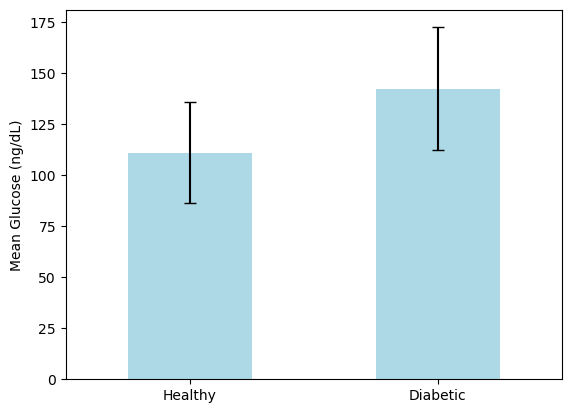

In [28]:
diab_agg=(
diab
.groupby(['disease_category']).agg(['mean', 'std'])
)

diab_agg['Glucose']['mean'].plot(kind='bar', yerr=diab_agg['Glucose']['std'], color='lightblue',capsize=4, rot=0)
plt.ylabel('Mean Glucose (ng/dL)')
plt.xlabel('')
#

In [29]:
styles = [dict(selector="caption",
            props=[("text-align", "left"),
                   ("font-size", "150%")])]
(diab.corr().style
.set_caption("Correlation between variables").set_table_styles(styles)
.background_gradient(axis=0, cmap="twilight")
)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.159244,0.258122,0.048197,-0.014305,0.089769,-0.006089,0.542750,0.247300
Glucose,0.159244,1.000000,0.222720,0.161745,0.403479,0.222619,0.136495,0.263017,0.486550
BloodPressure,0.258122,0.222720,1.000000,0.130800,0.007191,0.289230,0.001987,0.325947,0.168245
SkinThickness,0.048197,0.161745,0.130800,1.000000,0.230670,0.551572,0.153975,0.022866,0.187341
Insulin,-0.014305,0.403479,0.007191,0.230670,1.000000,0.194314,0.159158,0.037185,0.189667
BMI,0.089769,0.222619,0.289230,0.551572,0.194314,1.000000,0.156613,0.024689,0.303431
DiabetesPedigreeFunction,-0.006089,0.136495,0.001987,0.153975,0.159158,0.156613,1.000000,0.025966,0.186492
Age,0.542750,0.263017,0.325947,0.022866,0.037185,0.024689,0.025966,1.000000,0.249033
Outcome,0.247300,0.486550,0.168245,0.187341,0.189667,0.303431,0.186492,0.249033,1.000000


As you can see, we can get use pandas to get a quick plot of our liking. Again, just like every other package we have seen, we wrap around matplotlib. Why did the pandas develops chose to do this? Well, you technically dont ever have to leave pandas to use it. And if you dont care about aesthics, you can plot are really basic plot with ~20 characters. Pretty neat. 

you may be motivated to pick one package over the other based off of defulat aesthetics, but one thing to realize is that ALL packages we highlighted here are virtually identical when it comes to aesthetics. Whatever we can do in one, we can do in another, its a matter of preference But, if you prefer to not have to think too hard about how to acomplish an aestehtics, by all means, chose the package that makes sense for you!

Ok great, but are there any other options besides matplotlib and its wrappers? Indeed, there are a variety of interactive plots (which we will cover in a latter post), but I wnated to include this one because, well, its my favorite and you can generate static plots easily. 

PLOTLY HISTORY

In [31]:
fig = px.scatter_3d(diab, x='Glucose', y='Insulin', z='BMI',
              color='bp_category', size='Age', width=1000, height=1000,)

fig.show()